# **WEEK 9 - HOMEWORK 1**

# **About Dataset**

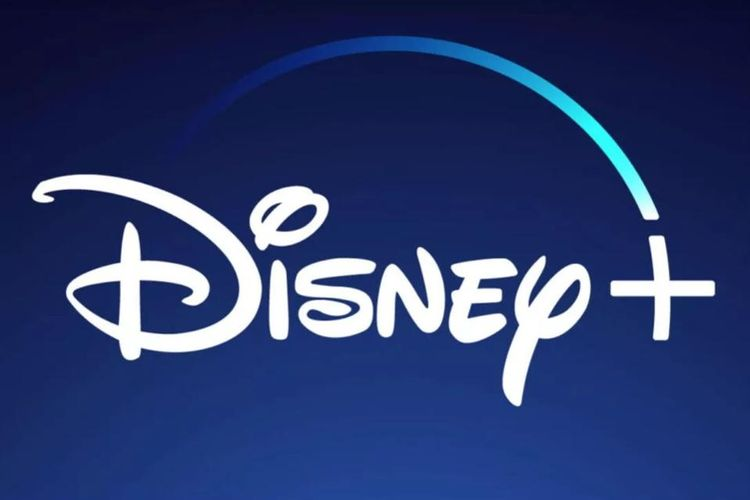

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.

In [ ]:
# Import Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS) 
import seaborn as sns
import plotly.express as px

In [ ]:
# Download data "disney_plus_titles.csv" di https://www.kaggle.com/shivamb/disney-movies-and-tv-shows for dataset

# Ini untuk upload dataset dari local ke google colab
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving disney_plus_titles.csv to disney_plus_titles (1).csv
User uploaded file "disney_plus_titles.csv" with length 383571 bytes


In [ ]:
data = pd.read_csv("disney_plus_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
df_tv = data[data["type"] == "TV Show"]
df_movies = data[data["type"] == "Movie"]

# **1. Analysis of Movies vs TV Shows**

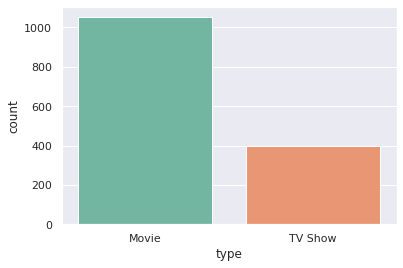

In [ ]:
sns.set(style = "darkgrid")
ax = sns.countplot(x = "type", data = data, palette = "Set2")

Dapat dilihat bahwa lebih banyak Movies dibandingkan TV Show dalam Disney+

# **2. Movie Rating Analysis**

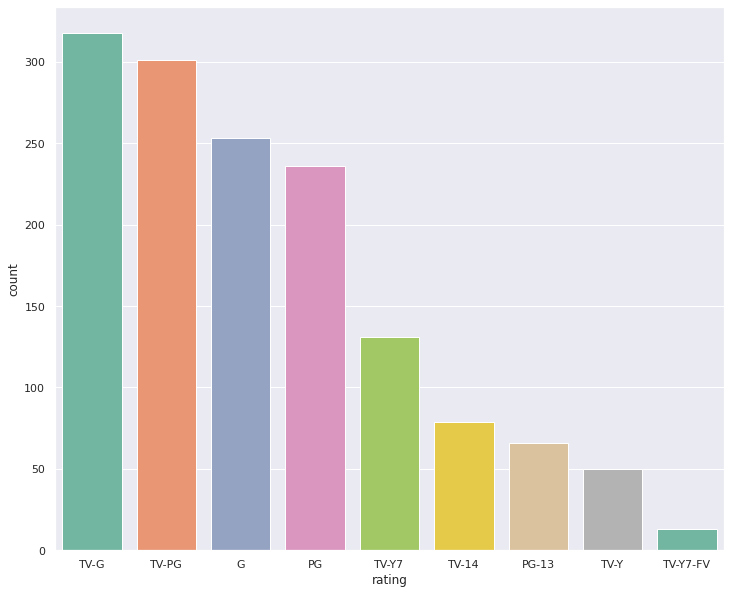

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style = "darkgrid")
ax = sns.countplot(x = "rating", data = data, palette = "Set2", 
                   order = data['rating'].value_counts().index[0:14])

Jumlah movies terbesar ada pada rating 'TV-G'. "TV-G" adalah peringkat yang ditetapkan oleh TV Parental Guidelines untuk program televisi yang dirancang hanya untuk segala usia.

Terbesar kedua adalah 'TV-PG' konten ini berisi materi yang mungkin menurut orang tua tidak cocok untuk anak kecil.

# **3. Analysis on Release Year of Movies**

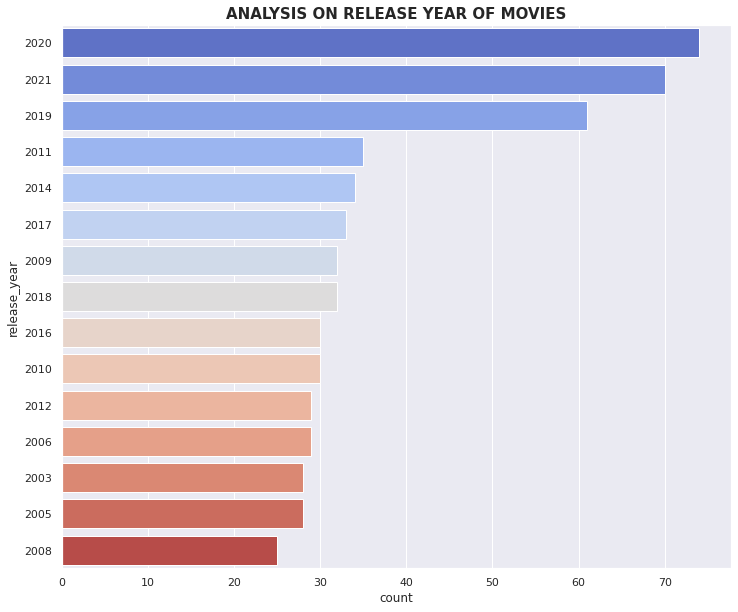

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="coolwarm", order=df_movies['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=15, fontweight='bold')
plt.show()

Sebagian besar movies dirilis pada tahun 2020 diikuti oleh 2021 dan 2019

# **4. Analysis on Release Year of TV Show**

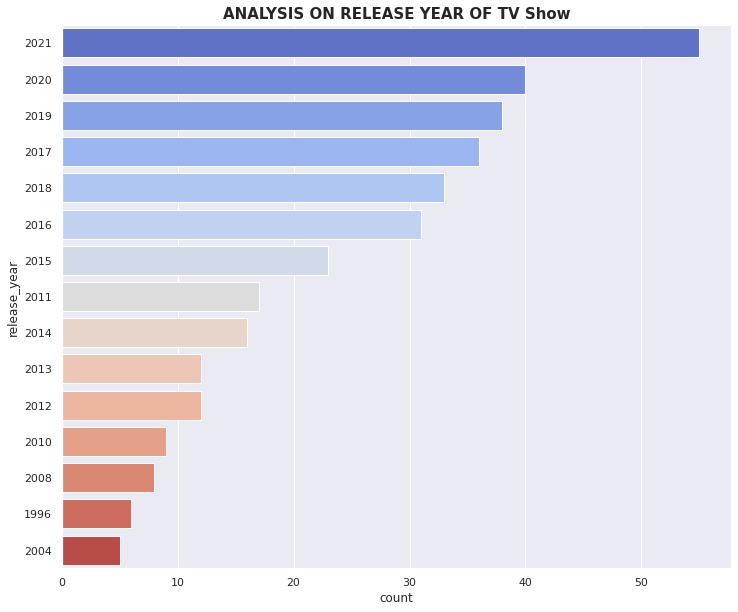

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="coolwarm", order=df_tv['release_year'].value_counts().index[0:15])

plt.title('ANALYSIS ON RELEASE YEAR OF TV Show', fontsize=15, fontweight='bold')
plt.show()

Sebagian besar TV Shows dirilis pada tahun 2021 diikuti oleh 2020 dan 2019

# **5. Distribution of Movies Duration**

In [ ]:
fig = px.histogram(x=df_movies['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of Movies Duration",
    xaxis_title="Duration of Movies",
)
fig.show()

Terbukti bahwa sebagian besar movies memiliki durasi mulai dari 44-45 menit dan 8 menit untuk short movies.

# **6. Distribution of TV Shows Duration**

In [ ]:
fig = px.histogram(x=df_tv['duration'])
fig.update_layout(
    title="Distribution of TV Shows Duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

Dapat dikatakan bahwa sebagian besar TV Shows berakhir pada musim ke-4 atau 5 (Season 4 or 5)

# **7. Top 10 Genre in Movies**

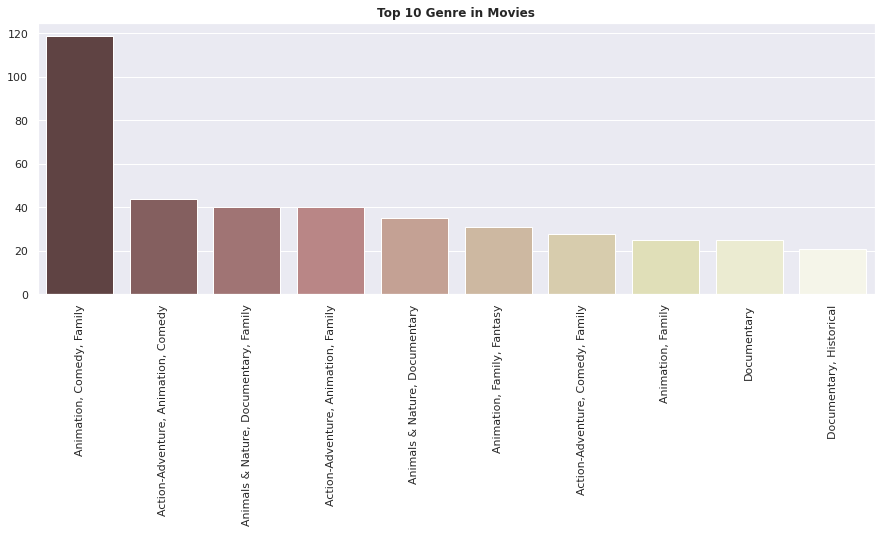

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies",fontweight="bold")
plt.show()

Dapat dilihat bahwa genre terbaik di Movies ada pada genre Animation, Comedy, Fantasy

# **8. Top 10 Genre in TV Shows**

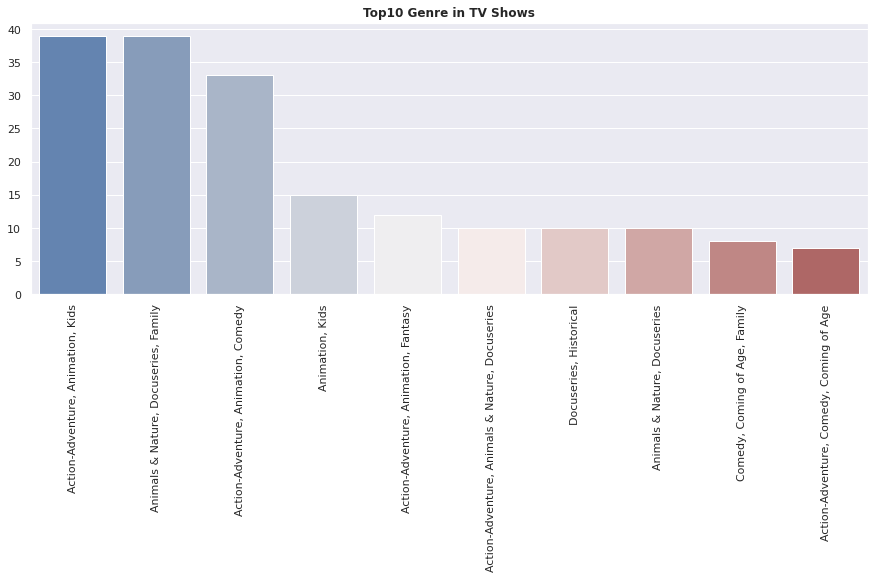

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

Dapat dilihat bahwa genre terbaik di TV Shows ada pada genre Action-Adventure, Kids, Animals & Nature, Family.

# **9. Directors with Most Movies**

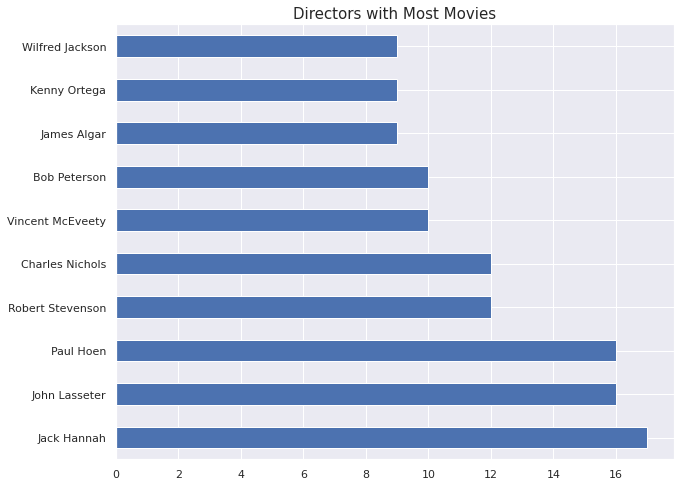

In [ ]:
plt.figure(figsize=(10,8))
df_movies["director"].value_counts().head(10).plot(kind='barh')
plt.title("Directors with Most Movies", size=15)
plt.show()

Dapat dilihat bahwa director dengan Movie terbanyak adalah Jack Hannah

# **10. Overview of Disney Plus titles**

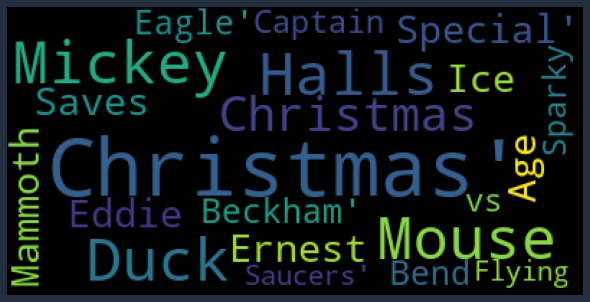

In [ ]:
# iterate through the csv file 
for val in data.description: 

   # typecaste each val to string 
   val = str(val) 

   # split the value 
   tokens = val.split() 

# Converts each token into lowercase 
for i in range(len(tokens)): 
    tokens[i] = tokens[i].lower() 

for words in tokens: 
    comment_words = comment_words + words + ' '
    

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='#00A8E1', 
            stopwords = stopwords, 
            min_font_size = 10).generate(comment_words) 


text = data['title'].values 

wordcloud = WordCloud().generate(str(text))


# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#232F3E') 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Dapat dilihat title movies/TV show terbanyak pada disney+ adalah movies/TV show dengan title "Chrismas '"